In [3]:
%matplotlib inline

In [4]:
import math
import pickle

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
from pathlib import Path

In [5]:
slice_df = pd.read_csv("slice_localization_data.csv", index_col = 0)
slice_df

,value0,value1,value2,value3,value4,value5,value6,value7,value8,value9,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
patientId,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,-0.250000,...,-0.25,0.980381,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.803851
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,-0.250000,...,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.745726
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,-0.250000,...,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.687600
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,-0.250000,...,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.629474
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,-0.250000,...,-0.25,0.976833,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.571348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.591906,0.357764,0.000000,0.000000,0.552321,0.795304,0.946697,0.952227,0.84395,0.798303,...,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,29.290398
96,0.612313,0.000000,0.000000,0.000000,0.864160,0.820531,0.000000,0.938813,0.94374,0.868504,...,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,27.945721
96,0.612313,0.000000,0.000000,0.000000,0.864160,0.820531,0.000000,0.938813,0.94374,0.868504,...,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,27.945721


In [6]:
slice_df.reset_index(inplace=True, drop=True)

In [7]:
slice_df.shape

(53500, 385)

In [8]:
slice_df

,value0,value1,value2,value3,value4,value5,value6,value7,value8,value9,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,-0.250000,...,-0.25,0.980381,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.803851
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,-0.250000,...,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.745726
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,-0.250000,...,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.687600
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,-0.250000,...,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.629474
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,-0.250000,...,-0.25,0.976833,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.571348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53495,0.591906,0.357764,0.000000,0.000000,0.552321,0.795304,0.946697,0.952227,0.84395,0.798303,...,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,29.290398
53496,0.612313,0.000000,0.000000,0.000000,0.864160,0.820531,0.000000,0.938813,0.94374,0.868504,...,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,27.945721
53497,0.612313,0.000000,0.000000,0.000000,0.864160,0.820531,0.000000,0.938813,0.94374,0.868504,...,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.00,27.945721
53498,0.634921,0.904555,0.956087,0.980208,0.157664,0.000000,-0.250000,-0.250000,-0.25000,-0.250000,...,-0.25,0.000000,0.0,0.994967,0.806688,0.0,0.0,-0.25,-0.25,14.582997


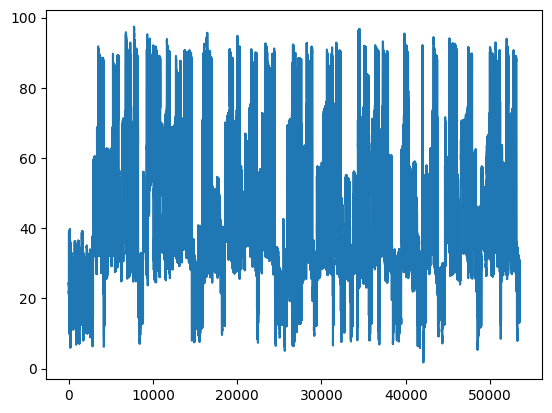

In [9]:
plt.plot(slice_df['reference']) 

In [10]:
train_slice_df, test_slice_df = train_test_split(slice_df, test_size=0.2, 
                                                 random_state=11)
#train_slice_df.to_csv(dataPath/"slice_train.csv", index=False)
#test_slice_df.to_csv(dataPath/"slice_test.csv", index=False)

print(train_slice_df.shape, test_slice_df.shape)

(42800, 385) (10700, 385)


In [11]:
X_train = train_slice_df[train_slice_df.columns[:-1]]
y_train = train_slice_df[train_slice_df.columns[-1]]

X_test = test_slice_df[train_slice_df.columns[:-1]]
y_test = test_slice_df[train_slice_df.columns[-1]]

print(X_train.shape, y_train.shape)

(42800, 384) (42800,)


In [12]:
X_train.columns[-5:]

Index(['value379', 'value380', 'value381', 'value382', 'value383'], dtype='object')

In [13]:
card = X_train.nunique()
card[card <= 2]

value38     2
value39     2
value48     2
value49     2
value59     1
value68     2
value69     1
value78     2
value79     2
value88     2
value89     2
value169    2
value178    2
value179    1
value188    2
value189    1
value199    2
value271    2
value279    2
value287    2
value343    2
value351    1
value359    2
value367    2
dtype: int64

In [14]:
low_card_cols = card[card <= 2].index
low_card_cols

Index(['value38', 'value39', 'value48', 'value49', 'value59', 'value68',
       'value69', 'value78', 'value79', 'value88', 'value89', 'value169',
       'value178', 'value179', 'value188', 'value189', 'value199', 'value271',
       'value279', 'value287', 'value343', 'value351', 'value359', 'value367'],
      dtype='object')

In [15]:
X_train = X_train.drop(columns = low_card_cols)
X_test = X_test.drop(columns = low_card_cols)
print(X_train.shape, X_test.shape)

(42800, 360) (10700, 360)


In [16]:
scaler = StandardScaler().fit(X_train)

X_train = pd.DataFrame(data=scaler.transform(X_train), 
                       index=X_train.index,
                       columns=X_train.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), 
                      index=X_test.index,
                      columns=X_test.columns)

print(X_train.shape, X_test.shape)

(42800, 360) (10700, 360)


In [204]:
train_std_slice_df = X_train
train_std_slice_df['Y'] = y_train

test_std_slice_df = X_test
test_std_slice_df['Y'] = y_test

### Linear model

1. Fit linear model with all predictors. Remove insignificant predictors using p-values at level 3%.

 2.   Fit reduced linear model lm_reduced_slice.

 3.   Create dictionary containing: AIC, R2 , RMSE, MAE, and number of predictors in the model:

validation_reduced_lm = {'AIC': m_AIC, 'R2': m_R2, 'RMSE': m_RMSE, 'MAE': m_MAE, 'num_variables': m_num_variables}


In [103]:
import statsmodels.api as sm

In [205]:
Y = train_std_slice_df["Y"]
X = train_std_slice_df.drop(columns=['Y'])

In [119]:
X = sm.add_constant(X)

mfull = sm.OLS(Y, sm.add_constant(X)).fit()

In [120]:
p_values = mfull.pvalues
features_to_keep = p_values[p_values < 0.03].index

X_new = X[features_to_keep]

mreduce = sm.OLS(Y, sm.add_constant(X_new)).fit()

In [121]:
mreduce.rsquared

0.8638882045172942

In [155]:
m_AIC = mfull.aic
m_R2 = mreduce.rsquared

X_test = sm.add_constant(X_test)

X_test = X_test[features_to_keep]

Y_pred = mreduce.predict(X_test)
# Calculate residuals
residuals = y_test - Y_pred

mse = np.mean(residuals**2)
# Calculate RMSE
m_RMSE = np.sqrt(mse)

# Calculate absolute residuals
absolute_residuals = abs(y_test - Y_pred)

# Calculate MAE
mae = np.mean(absolute_residuals)

m_MAE = mae

m_num_variables = len(mreduce.params) - 1

In [163]:
lm_reduced_slice = mreduce

In [157]:
validation_reduced_lm = {'AIC': m_AIC, 'R2': m_R2, 'RMSE': m_RMSE, 'MAE': m_MAE, 'num_variables': m_num_variables}

In [158]:
validation_reduced_lm

{'AIC': 302457.6300810666,
 'R2': 0.8638882045172942,
 'RMSE': 8.450981711744118,
 'MAE': 6.249744339096159,
 'num_variables': 245}

### PCR Method

4. Apply PCA regression from 'sklearn.decomposition'.

Fitting linear model with the PCA factors instead of the original features may throw an error of singular system. Think about ways of fixing it. Hint: Check standard deviations of the factors and/or eigenvalues of the covariance matrix of the original features.

5. Select just enough PCA meta-features, ranked by rel_imp_me to achieve same or larger R2 as the model lm_reduced_slice: 0.863888.

6. Validate the model with the selected meta-features. Prepare meta-features for the test sample using the same loadings as for the train part.

7. Create dictionary validation_PCR containing: AIC, R2, MSE, MAE, and the number of meta-features in the model.

validation_PCR = {'AIC': m_AIC, 'R2': m_R2, 'RMSE': m_RMSE, 'MAE': m_MAE, 'num_variables': m_num_variables}

8. Combine the validation results of both models and the model coefficients into one dictionary:

res = {'Validation': {'validation_reduced_lm': validation_reduced_lm, 'validation_PCR': validation_PCR},
        'Linear_Model': lm_reduced_slice.params,

        'PCR_Model': lm_PCA.params
        }

9. Save the results:

with open('result.pickle', 'wb') as f:

pickle.dump(res,f)



In [198]:
from sklearn.decomposition import PCA
nFactors = X.shape[1]

xPCA = PCA()
xPCA.fit(X)
xPCA_importance = pd.DataFrame({'Standard deviation': np.sqrt(xPCA.explained_variance_),
                               'Proportion of Variance': xPCA.explained_variance_ratio_,
                               'Cumulative Proportion': np.cumsum(xPCA.explained_variance_ratio_)},
                               columns=['Standard deviation','Proportion of Variance','Cumulative Proportion'],
                               index=[ "PC%i" %(j) for j in range(nFactors)])
print(xPCA_importance.T)

                             PC0       PC1       PC2       PC3       PC4  \
Standard deviation      7.158899  6.633336  4.868482  3.664181  3.546677   
Proportion of Variance  0.142357  0.122223  0.065838  0.037294  0.034941   
Cumulative Proportion   0.142357  0.264580  0.330418  0.367712  0.402652   

                             PC5       PC6       PC7       PC8       PC9  ...  \
Standard deviation      3.073536  2.947885  2.667451  2.435215  2.341547  ...   
Proportion of Variance  0.026240  0.024138  0.019764  0.016473  0.015230  ...   
Cumulative Proportion   0.428892  0.453031  0.472795  0.489268  0.504497  ...   

                           PC350     PC351     PC352     PC353     PC354  \
Standard deviation      0.155798  0.144836  0.142621  0.101289  0.101185   
Proportion of Variance  0.000067  0.000058  0.000057  0.000028  0.000028   
Cumulative Proportion   0.999755  0.999813  0.999869  0.999898  0.999926   

                           PC355     PC356     PC357     PC358   

In [199]:
factorLoadings = pd.DataFrame(xPCA.components_,
                              columns=["X%i" %(j+1) for j in range(nFactors)],
                              index=["PC%i" %(j+1) for j in range(nFactors)])
#print(factorLoadings.T)
factorScores = pd.DataFrame(np.dot(X, xPCA.components_.T), columns =["PC%i"%(j+1) for j in range(nFactors)])
print('factorScores.shape =', factorScores.shape)
print(factorScores[:6])
zeroLoading = xPCA.mean_
print('\nZero loading:')
print(zeroLoading)

factorScores.shape = (42800, 360)
         PC1       PC2       PC3        PC4       PC5       PC6       PC7  \
0  -5.812770 -0.213766  8.513231  -1.767099 -2.008583 -2.862293 -2.258108   
1  -8.993793 -8.936692  0.458821   1.127608  1.320356  0.116361 -0.406474   
2  17.805152 -8.305710  4.171711  12.372975  5.015145  1.682412  2.980794   
3   0.854910  1.174709 -6.034497  -2.928256 -1.119555 -1.788854  1.861627   
4  -0.538492  9.821501 -2.731621   4.063953 -5.522272  2.081012 -1.300194   
5   1.615571  8.358027 -2.761511   1.648548  0.755188 -1.435986 -1.762069   

        PC8       PC9      PC10  ...     PC351     PC352     PC353     PC354  \
0  1.990633 -2.394931  1.447674  ... -0.042831  0.038778 -0.003559  0.011486   
1 -4.264972 -0.382218 -0.681809  ... -0.048688  0.028524  0.007363  0.022253   
2  2.863064 -3.524258 -2.166523  ...  0.009343 -0.045947  0.062987 -0.010977   
3 -0.101518  0.563470 -0.069639  ...  0.026295  0.012584  0.057305  0.005374   
4 -3.117148  0.867453 -1.4

In [200]:
def rel_imp_me(X, y): 
    names = X.columns
    ser = pd.Series(index = names)
    lm0 = sm.OLS(y, sm.add_constant(X)).fit()
    for c in names:
        lm = sm.OLS(y, sm.add_constant(X[names.drop(c)])).fit()
        ser[c] = lm0.rsquared - lm.rsquared 
    res = pd.DataFrame(columns =['last'], index=names)
    res['last'] = ser
    return res

In [201]:
def rSquar(j, y, X):
    return sm.OLS(y, sm.add_constant(X.iloc[:,:j])).fit().rsquared

In [206]:
metrics_PCA = rel_imp_me(factorScores, Y)
print(metrics_PCA)

ValueError: The indices for endog and exog are not aligned

In [63]:
first_PCA_rank = metrics_PCA["first"].rank(ascending=False, method='first')
metrics_PCA_sort = pd.DataFrame({"Factors" : first_PCA_rank.index,
                                 "Rank" : first_PCA_rank.values}).sort_values(by="Rank") 
orderedFactors = pd.DataFrame(factorScores, columns= metrics_PCA_sort["Factors"])

orderedLoadings = pd.DataFrame(factorLoadings.T,  columns= metrics_PCA_sort["Factors"])

orderedPCA_R2 = [rSquar(j,Y, orderedFactors) for j in range(2,492)]

In [76]:
orderedFactors.shape

(53500, 384)

In [80]:
pca_arr = np.array(orderedPCA_R2)

In [85]:
pca_arr = pca_arr[:382]
print(pca_arr.shape)
pca_arr = np.stack((pca_arr, np.arange(2, 384)), axis=1)

(382,)


In [167]:
pca_arr[pca_arr[:,0] >= m_R2]

array([[  0.86389034, 278.        ],
       [  0.86390902, 279.        ],
       [  0.86392744, 280.        ],
       [  0.86394578, 281.        ],
       [  0.86396339, 282.        ],
       [  0.8639806 , 283.        ],
       [  0.86399748, 284.        ],
       [  0.86401403, 285.        ],
       [  0.86402957, 286.        ],
       [  0.86404516, 287.        ],
       [  0.86405996, 288.        ],
       [  0.86407363, 289.        ],
       [  0.86408682, 290.        ],
       [  0.86409989, 291.        ],
       [  0.86411182, 292.        ],
       [  0.86412403, 293.        ],
       [  0.86413563, 294.        ],
       [  0.8641471 , 295.        ],
       [  0.86415801, 296.        ],
       [  0.86416809, 297.        ],
       [  0.86417807, 298.        ],
       [  0.86418788, 299.        ],
       [  0.86419687, 300.        ],
       [  0.86420625, 301.        ],
       [  0.86421537, 302.        ],
       [  0.86422377, 303.        ],
       [  0.86423272, 304.        ],
 

In [169]:
X_PCA = orderedFactors[:278]

In [ ]:
m_num_variables = 278



In [94]:
validation_PCR = {'AIC': m_AIC, 'R2': m_R2, 'RMSE': m_RMSE, 'MAE': m_MAE, 'num_variables': m_num_variables}

In [ ]:
orderedPCAfinal = [rSquar(j,Y, orderedFactors) for j in range(2,492)]

In [164]:
res = {'Validation': 
            {'validation_reduced_lm': validation_reduced_lm, 
             'validation_PCR': validation_PCR},
       'Linear_Model': lm_reduced_slice.params,
        'PCR_Model': 0
      }

In [165]:
with open('result.pickle', 'wb') as f:
    pickle.dump(res,f)